The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

Any time a variable is set to `None`, make sure to set it to the correct code.

Unit tests are written for you under `test_module.py`.


In [289]:
import pandas as pd
import seaborn as sns
import numpy as np

In [290]:
df = pd.read_csv('medical_examination.csv')

In [291]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [292]:
df.isnull().sum() # check for missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### BMI calculation. 

 [weight (kg) / height (cm) / height (cm)] x 10,000

In [293]:
df['bmi'] = df['weight']/(df['height'])**2

In [294]:
df['bmi'] = df['bmi'] * 10000

In [295]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [296]:
df['overweight'] = df['bmi'] >25

In [297]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,False


In [298]:
df["overweight"] = df["overweight"].astype(int)

In [299]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0


In [300]:
dff = df

In [301]:
#Normalized data
dff[['cholesterol', 'gluc']] = np.where(dff[['cholesterol', 'gluc']].values > 1, 1, 0)

In [302]:
dff.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0


create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value

In [303]:
dff_cat = pd.melt(
        frame=dff, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
        id_vars=['cardio'])

In [304]:
dff_cat.head(5)

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [305]:
dff_cat = pd.DataFrame(dff_cat.groupby(by=['variable', 'value', 'cardio'])['value'].count()).rename(columns={ 'value':'total'}).reset_index()

In [306]:
dff_cat.head(5)

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080


In [307]:
dff_cat.columns

Index(['variable', 'value', 'cardio', 'total'], dtype='object')

In [308]:
dff_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  24 non-null     object
 1   value     24 non-null     int64 
 2   cardio    24 non-null     int64 
 3   total     24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


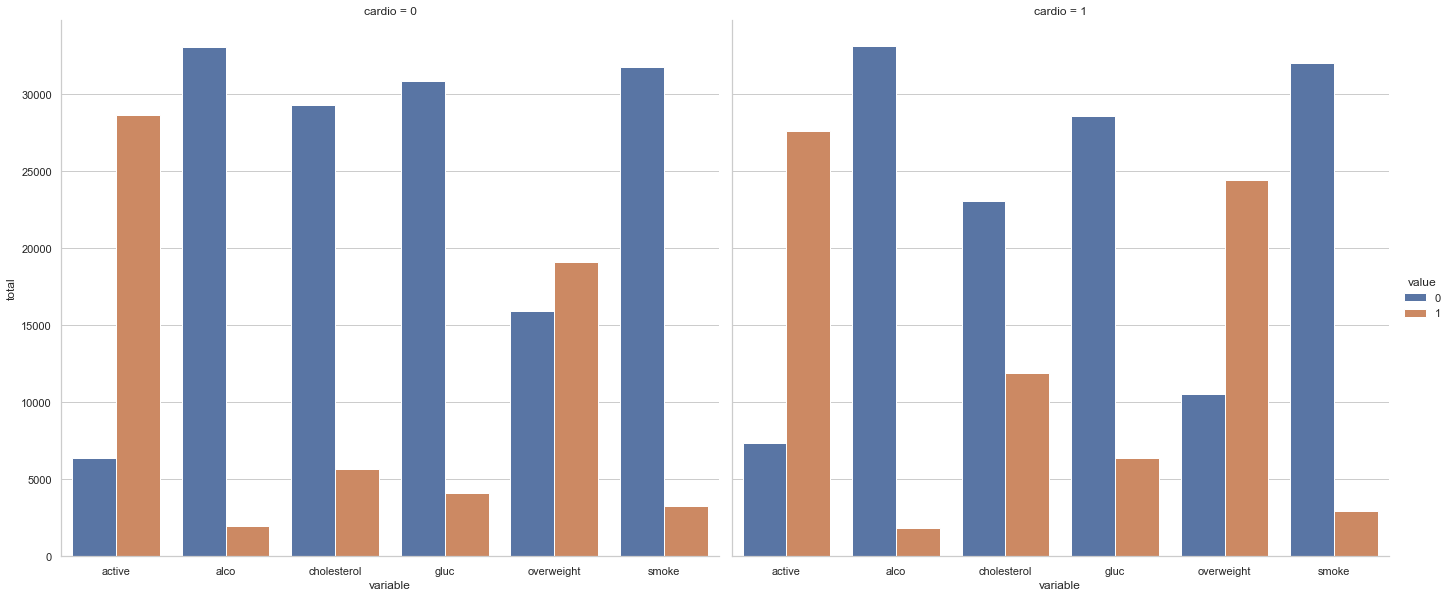

In [309]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x='variable', y='total', data=dff_cat, hue='value', col='cardio', kind='bar', height=8.27, aspect=9.7/8.27)

# Clean the data

In [317]:
dff.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'overweight'],
      dtype='object')

In [324]:
df_clean = dff[
    (dff['ap_lo'] <= dff['ap_hi']) & 
    (df['height'] >= dff['height'].quantile(0.025)) & 
    (dff['height'] <= dff['height'].quantile(0.975)) & 
    (dff['weight'] >= df['weight'].quantile(0.025)) & 
    (dff['weight'] <= dff['weight'].quantile(0.975))]

In [325]:
df_clean

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [340]:
corr = df_clean.corr() #correlation

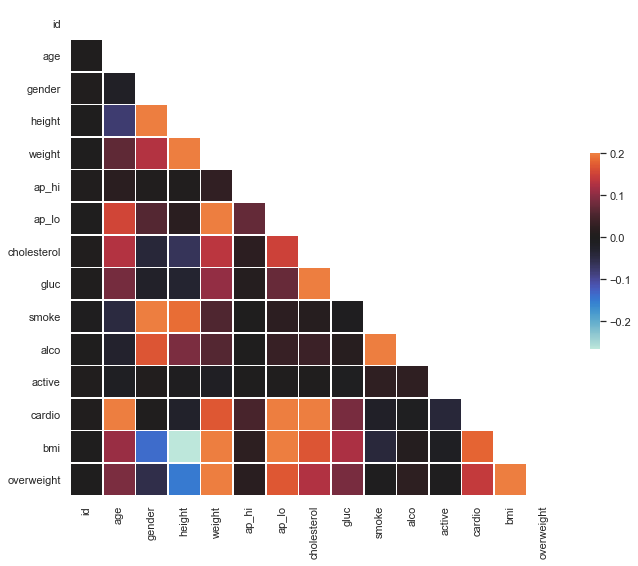

In [341]:
# mask the upper triangle
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
    
# Set up the matplotlib figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11, 9))
heatplot = sns.heatmap(corr, mask=mask, vmax=.2, center=0,
                square=True, linewidths=.6, cbar_kws={"shrink": .4})

In [343]:
fig.savefig('heatplot.png')